## Import libraries

In [5]:
import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
import scipy.io

## Download Iris Dataset and convert to ndarray

In [6]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None).values
monk2 = scipy.io.loadmat('monk2.mat')['monk2']

## Prepare dataset

In [7]:
# For repeatability
np.random.seed(12)

# Retrieve Dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      header=None).values

for row in dataset:
    if row[4] == 'Iris-setosa':
        row[4] = 0.0
    elif row[4] == 'Iris-versicolor':
        row[4] = 1.0

features_combination = [0, 1]

dataset = dataset[:100]
np.random.shuffle(dataset)

# Convert labels to same type as dataset
labels = dataset[:, -1].astype(np.float64)

norm_dataset = dataset[:, features_combination].astype(np.float64)

# Training set is 80%
training_set = norm_dataset[:80]
training_labels = labels[:80]

# Test set is 20%
test_set = norm_dataset[-20:]
test_labels = labels[-20:]

# Specify training parameters
learning_rate = 0.1

# Monk database
# Uncomment this lines to test monk2 dataset
# training_set = monk2[:345, features_combination]
# training_labels = monk2[:345, -1]
# test_set = monk2[345:, features_combination]
# test_labels = monk2[345:, -1]

## Specify training parameters

In [8]:
learning_rate = 0.1

## Define Logistic Regression Model

In [9]:
class LogisticRegression:
    def __init__(self, training_set, labels, learning_rate):
        self.training_set = training_set
        self.labels = labels
        self.learning_rate = learning_rate

        self.cost_history = []

        input_size = self.training_set.shape

        self.input_layer = training_set
        self.input_weights = np.random.uniform(0, 0.4, input_size[1])

    def forward(self, input):
        z = np.dot(input, self.input_weights)
        prediction = np.array(sigmoid(z), dtype=float)

        return prediction

    def cost_function(self, prediction):
        cost = 0
        sum_errors = 0
        for idx, pred in enumerate(prediction):
            if self.labels[idx] == 1:
                cost = - self.labels[idx] * np.log(pred + 1e-13)

            elif self.labels[idx] == 0:
                cost = - (1 - self.labels[idx]) * np.log(1 - pred + 1e-13)
            sum_errors += cost
        return sum_errors / len(prediction)
        # return sum_errors

    def backpropagation(self, predictions):
        self.gradients = np.zeros(self.input_weights.shape[0])
        for idx in range(self.input_weights.shape[0]):
            self.gradients[idx] = np.dot((predictions - self.labels), self.input_layer[:, idx])

    def gradient_descend(self):
        self.input_weights = self.input_weights - (self.learning_rate * self.gradients) / self.input_layer.shape[0]

    def train_network(self, epochs):
        for epoch in range(epochs):
            predictions = self.forward(self.input_layer)
            cost = self.cost_function(predictions)
            self.cost_history.append(cost)
            self.backpropagation(predictions)
            self.gradient_descend()

            if np.abs(cost) < 1e-11:
                print("Convergence reached by threshold")
                return

            print("Epoch: {0}, Cost: {1}".format(epoch, cost))

            # Uncomment these two lines to see progression of decision boundary while
            # network is being trained
            # if not epoch % 100:
            #     plot_decision_boundary(training_set, training_labels, self.test_network)

    def test_network(self, test_set):
        return self.forward(test_set)

## Define Sigmoid function

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Define Plotting functions

In [11]:
def plot_decision_boundary(X, y, pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


def plot_cost_history(learning_rates, cost_history):
    for i in range(len(learning_rates)):
        plt.plot(range(len(cost_history[i])), cost_history[i], label="Learning rate {0}".format(learning_rates[i]))
    plt.legend()
    plt.show()

## Other functions

In [12]:
def get_accuracy(test_labels, test_pred):
    success = 0
    for i in range(len(test_labels)):
        if test_labels[i] == test_pred[i].round():
            success += 1
    return success / len(test_labels)


def learning_rate_experiments():
    learning_rate = [0.1, 0.2, 0.3, 0.4]
    cost_history_per_lr = []
    for lr in learning_rate:
        logistic_regression = LogisticRegression(training_set=training_set,
                                                 labels=training_labels,
                                                 learning_rate=lr)

        logistic_regression.train_network(epochs=1000)
        cost_history_per_lr.append(logistic_regression.cost_history)
        test_pred = logistic_regression.test_network(test_set)
        print(get_accuracy(test_labels, test_pred) * 100)

    plot_cost_history(learning_rate, cost_history_per_lr)

## Learning rates Experiment

Epoch: 0, Cost: 1.1827312000976804
Epoch: 1, Cost: 0.7814208447753554
Epoch: 2, Cost: 0.724325820760338
Epoch: 3, Cost: 0.7175575009553431
Epoch: 4, Cost: 0.7111387339344376
Epoch: 5, Cost: 0.7048164161513084
Epoch: 6, Cost: 0.6985891240140674
Epoch: 7, Cost: 0.6924554751908941
Epoch: 8, Cost: 0.686414090875713
Epoch: 9, Cost: 0.6804635967979574
Epoch: 10, Cost: 0.674602624198832
Epoch: 11, Cost: 0.6688298107590729
Epoch: 12, Cost: 0.6631438014782521
Epoch: 13, Cost: 0.6575432495059097
Epoch: 14, Cost: 0.6520268169249903
Epoch: 15, Cost: 0.6465931754881573
Epoch: 16, Cost: 0.6412410073077311
Epoch: 17, Cost: 0.6359690055000691
Epoch: 18, Cost: 0.6307758747853368
Epoch: 19, Cost: 0.625660332043708
Epoch: 20, Cost: 0.6206211068290947
Epoch: 21, Cost: 0.6156569418415975
Epoch: 22, Cost: 0.6107665933599181
Epoch: 23, Cost: 0.605948831635017
Epoch: 24, Cost: 0.6012024412463525
Epoch: 25, Cost: 0.5965262214220599
Epoch: 26, Cost: 0.5919189863244536
Epoch: 27, Cost: 0.5873795653022486
Epoch: 

Epoch: 505, Cost: 0.16234081529506278
Epoch: 506, Cost: 0.16217593872258007
Epoch: 507, Cost: 0.16201161200396025
Epoch: 508, Cost: 0.16184783232265737
Epoch: 509, Cost: 0.16168459688153003
Epoch: 510, Cost: 0.16152190290267393
Epoch: 511, Cost: 0.16135974762725674
Epoch: 512, Cost: 0.16119812831535374
Epoch: 513, Cost: 0.16103704224578602
Epoch: 514, Cost: 0.16087648671595994
Epoch: 515, Cost: 0.16071645904170792
Epoch: 516, Cost: 0.16055695655713145
Epoch: 517, Cost: 0.16039797661444552
Epoch: 518, Cost: 0.1602395165838244
Epoch: 519, Cost: 0.16008157385324948
Epoch: 520, Cost: 0.15992414582835787
Epoch: 521, Cost: 0.15976722993229336
Epoch: 522, Cost: 0.1596108236055584
Epoch: 523, Cost: 0.15945492430586755
Epoch: 524, Cost: 0.15929952950800322
Epoch: 525, Cost: 0.1591446367036711
Epoch: 526, Cost: 0.1589902434013595
Epoch: 527, Cost: 0.15883634712619737
Epoch: 528, Cost: 0.15868294541981656
Epoch: 529, Cost: 0.15853003584021289
Epoch: 530, Cost: 0.1583776159616102
Epoch: 531, Cost:

Epoch: 169, Cost: 0.19785926587583685
Epoch: 170, Cost: 0.19724672302053797
Epoch: 171, Cost: 0.19663985211430965
Epoch: 172, Cost: 0.1960385731408772
Epoch: 173, Cost: 0.19544280758719243
Epoch: 174, Cost: 0.19485247840842973
Epoch: 175, Cost: 0.19426750999394854
Epoch: 176, Cost: 0.19368782813419255
Epoch: 177, Cost: 0.19311335998849424
Epoch: 178, Cost: 0.19254403405375756
Epoch: 179, Cost: 0.19197978013399095
Epoch: 180, Cost: 0.19142052931066325
Epoch: 181, Cost: 0.1908662139138585
Epoch: 182, Cost: 0.1903167674942027
Epoch: 183, Cost: 0.18977212479554167
Epoch: 184, Cost: 0.18923222172834306
Epoch: 185, Cost: 0.18869699534380457
Epoch: 186, Cost: 0.18816638380864292
Epoch: 187, Cost: 0.1876403263805457
Epoch: 188, Cost: 0.18711876338426506
Epoch: 189, Cost: 0.1866016361883331
Epoch: 190, Cost: 0.18608888718238215
Epoch: 191, Cost: 0.1855804597550495
Epoch: 192, Cost: 0.18507629827245148
Epoch: 193, Cost: 0.1845763480572084
Epoch: 194, Cost: 0.18408055536800486
Epoch: 195, Cost: 0

Epoch: 807, Cost: 0.09694322582595914
Epoch: 808, Cost: 0.09690095302307353
Epoch: 809, Cost: 0.09685877507520826
Epoch: 810, Cost: 0.09681669166159687
Epoch: 811, Cost: 0.09677470246293861
Epoch: 812, Cost: 0.09673280716139009
Epoch: 813, Cost: 0.09669100544055677
Epoch: 814, Cost: 0.09664929698548459
Epoch: 815, Cost: 0.09660768148265188
Epoch: 816, Cost: 0.09656615861996087
Epoch: 817, Cost: 0.09652472808672975
Epoch: 818, Cost: 0.09648338957368466
Epoch: 819, Cost: 0.09644214277295107
Epoch: 820, Cost: 0.09640098737804684
Epoch: 821, Cost: 0.096359923083873
Epoch: 822, Cost: 0.0963189495867068
Epoch: 823, Cost: 0.09627806658419366
Epoch: 824, Cost: 0.09623727377533939
Epoch: 825, Cost: 0.09619657086050193
Epoch: 826, Cost: 0.09615595754138483
Epoch: 827, Cost: 0.09611543352102839
Epoch: 828, Cost: 0.09607499850380301
Epoch: 829, Cost: 0.09603465219540122
Epoch: 830, Cost: 0.09599439430283048
Epoch: 831, Cost: 0.09595422453440529
Epoch: 832, Cost: 0.09591414259974052
Epoch: 833, Cos

Epoch: 462, Cost: 0.10139077008561673
Epoch: 463, Cost: 0.1013115024684302
Epoch: 464, Cost: 0.10123253374351952
Epoch: 465, Cost: 0.10115386220524884
Epoch: 466, Cost: 0.10107548616113574
Epoch: 467, Cost: 0.10099740393172316
Epoch: 468, Cost: 0.10091961385045314
Epoch: 469, Cost: 0.10084211426354188
Epoch: 470, Cost: 0.10076490352985612
Epoch: 471, Cost: 0.10068798002079196
Epoch: 472, Cost: 0.10061134212015306
Epoch: 473, Cost: 0.10053498822403235
Epoch: 474, Cost: 0.10045891674069427
Epoch: 475, Cost: 0.1003831260904577
Epoch: 476, Cost: 0.10030761470558143
Epoch: 477, Cost: 0.10023238103015034
Epoch: 478, Cost: 0.10015742351996262
Epoch: 479, Cost: 0.1000827406424191
Epoch: 480, Cost: 0.10000833087641274
Epoch: 481, Cost: 0.09993419271222057
Epoch: 482, Cost: 0.09986032465139602
Epoch: 483, Cost: 0.09978672520666286
Epoch: 484, Cost: 0.09971339290181001
Epoch: 485, Cost: 0.09964032627158796
Epoch: 486, Cost: 0.09956752386160612
Epoch: 487, Cost: 0.09949498422823144
Epoch: 488, Cos

Epoch: 145, Cost: 0.13082316302683977
Epoch: 146, Cost: 0.13051395144254563
Epoch: 147, Cost: 0.13020747456044704
Epoch: 148, Cost: 0.12990369534695906
Epoch: 149, Cost: 0.12960257744439269
Epoch: 150, Cost: 0.12930408515548375
Epoch: 151, Cost: 0.12900818342834877
Epoch: 152, Cost: 0.12871483784185023
Epoch: 153, Cost: 0.12842401459136044
Epoch: 154, Cost: 0.12813568047491045
Epoch: 155, Cost: 0.12784980287971273
Epoch: 156, Cost: 0.12756634976904518
Epoch: 157, Cost: 0.1272852896694846
Epoch: 158, Cost: 0.1270065916584811
Epoch: 159, Cost: 0.12673022535225997
Epoch: 160, Cost: 0.126456160894043
Epoch: 161, Cost: 0.1261843689425785
Epoch: 162, Cost: 0.12591482066097115
Epoch: 163, Cost: 0.12564748770580172
Epoch: 164, Cost: 0.12538234221652927
Epoch: 165, Cost: 0.12511935680516537
Epoch: 166, Cost: 0.12485850454621468
Epoch: 167, Cost: 0.12459975896687103
Epoch: 168, Cost: 0.12434309403746449
Epoch: 169, Cost: 0.12408848416214875
Epoch: 170, Cost: 0.12383590416982529
Epoch: 171, Cost:

Epoch: 780, Cost: 0.07855906813917093
Epoch: 781, Cost: 0.07853716458922701
Epoch: 782, Cost: 0.0785153125274465
Epoch: 783, Cost: 0.07849351177929223
Epoch: 784, Cost: 0.07847176217101624
Epoch: 785, Cost: 0.07845006352965603
Epoch: 786, Cost: 0.07842841568302947
Epoch: 787, Cost: 0.07840681845973076
Epoch: 788, Cost: 0.07838527168912611
Epoch: 789, Cost: 0.07836377520134889
Epoch: 790, Cost: 0.0783423288272957
Epoch: 791, Cost: 0.07832093239862206
Epoch: 792, Cost: 0.07829958574773785
Epoch: 793, Cost: 0.07827828870780335
Epoch: 794, Cost: 0.07825704111272475
Epoch: 795, Cost: 0.07823584279715032
Epoch: 796, Cost: 0.07821469359646568
Epoch: 797, Cost: 0.07819359334679025
Epoch: 798, Cost: 0.07817254188497298
Epoch: 799, Cost: 0.07815153904858783
Epoch: 800, Cost: 0.0781305846759304
Epoch: 801, Cost: 0.07810967860601335
Epoch: 802, Cost: 0.07808882067856268
Epoch: 803, Cost: 0.07806801073401375
Epoch: 804, Cost: 0.07804724861350723
Epoch: 805, Cost: 0.07802653415888514
Epoch: 806, Cos

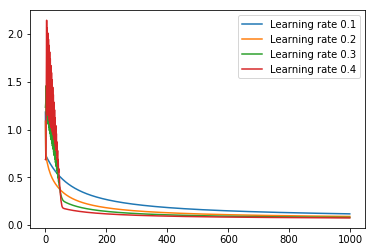

In [13]:
learning_rate_experiments()

## Train Model

Epoch: 0, Cost: 0.9412557458372912
Epoch: 1, Cost: 0.6984984879462213
Epoch: 2, Cost: 0.680621817717965
Epoch: 3, Cost: 0.6747477070014205
Epoch: 4, Cost: 0.6689727104025176
Epoch: 5, Cost: 0.663284552835486
Epoch: 6, Cost: 0.6576818860605012
Epoch: 7, Cost: 0.6521633719269084
Epoch: 8, Cost: 0.6467276819376382
Epoch: 9, Cost: 0.6413734979386422
Epoch: 10, Cost: 0.6360995127643876
Epoch: 11, Cost: 0.630904430838727
Epoch: 12, Cost: 0.6257869687321723
Epoch: 13, Cost: 0.6207458556766671
Epoch: 14, Cost: 0.6157798340390571
Epoch: 15, Cost: 0.6108876597544807
Epoch: 16, Cost: 0.6060681027209782
Epoch: 17, Cost: 0.6013199471566488
Epoch: 18, Cost: 0.5966419919207114
Epoch: 19, Cost: 0.5920330507998552
Epoch: 20, Cost: 0.5874919527612723
Epoch: 21, Cost: 0.5830175421737886
Epoch: 22, Cost: 0.5786086789984896
Epoch: 23, Cost: 0.5742642389502491
Epoch: 24, Cost: 0.5699831136315565
Epoch: 25, Cost: 0.5657642106400111
Epoch: 26, Cost: 0.5616064536508554
Epoch: 27, Cost: 0.55750878247587
Epoch: 

Epoch: 605, Cost: 0.1473461835824438
Epoch: 606, Cost: 0.1472273009116751
Epoch: 607, Cost: 0.14710875072449636
Epoch: 608, Cost: 0.14699053159133052
Epoch: 609, Cost: 0.1468726420908904
Epoch: 610, Cost: 0.1467550808101185
Epoch: 611, Cost: 0.14663784634412683
Epoch: 612, Cost: 0.14652093729613813
Epoch: 613, Cost: 0.14640435227742696
Epoch: 614, Cost: 0.1462880899072613
Epoch: 615, Cost: 0.14617214881284535
Epoch: 616, Cost: 0.14605652762926116
Epoch: 617, Cost: 0.1459412249994134
Epoch: 618, Cost: 0.14582623957397184
Epoch: 619, Cost: 0.14571157001131613
Epoch: 620, Cost: 0.14559721497748043
Epoch: 621, Cost: 0.14548317314609882
Epoch: 622, Cost: 0.1453694431983507
Epoch: 623, Cost: 0.14525602382290675
Epoch: 624, Cost: 0.145142913715876
Epoch: 625, Cost: 0.1450301115807526
Epoch: 626, Cost: 0.14491761612836324
Epoch: 627, Cost: 0.14480542607681515
Epoch: 628, Cost: 0.1446935401514448
Epoch: 629, Cost: 0.14458195708476645
Epoch: 630, Cost: 0.1444706756164209
Epoch: 631, Cost: 0.1443

Epoch: 1252, Cost: 0.10665742197889147
Epoch: 1253, Cost: 0.1066239180657739
Epoch: 1254, Cost: 0.1065904618480031
Epoch: 1255, Cost: 0.10655705322225502
Epoch: 1256, Cost: 0.10652369208550883
Epoch: 1257, Cost: 0.10649037833504568
Epoch: 1258, Cost: 0.10645711186844715
Epoch: 1259, Cost: 0.10642389258359489
Epoch: 1260, Cost: 0.10639072037866862
Epoch: 1261, Cost: 0.10635759515214574
Epoch: 1262, Cost: 0.10632451680280006
Epoch: 1263, Cost: 0.10629148522970044
Epoch: 1264, Cost: 0.10625850033220999
Epoch: 1265, Cost: 0.10622556200998481
Epoch: 1266, Cost: 0.10619267016297311
Epoch: 1267, Cost: 0.10615982469141391
Epoch: 1268, Cost: 0.10612702549583612
Epoch: 1269, Cost: 0.10609427247705769
Epoch: 1270, Cost: 0.10606156553618384
Epoch: 1271, Cost: 0.10602890457460681
Epoch: 1272, Cost: 0.10599628949400439
Epoch: 1273, Cost: 0.10596372019633886
Epoch: 1274, Cost: 0.10593119658385637
Epoch: 1275, Cost: 0.10589871855908513
Epoch: 1276, Cost: 0.10586628602483521
Epoch: 1277, Cost: 0.105833

Epoch: 1891, Cost: 0.09191786841015666
Epoch: 1892, Cost: 0.09190198979151057
Epoch: 1893, Cost: 0.09188612660948581
Epoch: 1894, Cost: 0.09187027884161716
Epoch: 1895, Cost: 0.09185444646548366
Epoch: 1896, Cost: 0.09183862945870831
Epoch: 1897, Cost: 0.09182282779895798
Epoch: 1898, Cost: 0.09180704146394358
Epoch: 1899, Cost: 0.09179127043141949
Epoch: 1900, Cost: 0.09177551467918368
Epoch: 1901, Cost: 0.09175977418507789
Epoch: 1902, Cost: 0.09174404892698673
Epoch: 1903, Cost: 0.09172833888283863
Epoch: 1904, Cost: 0.09171264403060482
Epoch: 1905, Cost: 0.0916969643482997
Epoch: 1906, Cost: 0.09168129981398056
Epoch: 1907, Cost: 0.0916656504057476
Epoch: 1908, Cost: 0.09165001610174392
Epoch: 1909, Cost: 0.0916343968801549
Epoch: 1910, Cost: 0.09161879271920874
Epoch: 1911, Cost: 0.0916032035971757
Epoch: 1912, Cost: 0.0915876294923689
Epoch: 1913, Cost: 0.09157207038314329
Epoch: 1914, Cost: 0.09155652624789598
Epoch: 1915, Cost: 0.0915409970650661
Epoch: 1916, Cost: 0.0915254828

Epoch: 2530, Cost: 0.08417677303946106
Epoch: 2531, Cost: 0.0841675449133915
Epoch: 2532, Cost: 0.08415832368121763
Epoch: 2533, Cost: 0.08414910933535824
Epoch: 2534, Cost: 0.08413990186824324
Epoch: 2535, Cost: 0.0841307012723138
Epoch: 2536, Cost: 0.08412150754002226
Epoch: 2537, Cost: 0.08411232066383191
Epoch: 2538, Cost: 0.0841031406362174
Epoch: 2539, Cost: 0.08409396744966441
Epoch: 2540, Cost: 0.08408480109666962
Epoch: 2541, Cost: 0.08407564156974098
Epoch: 2542, Cost: 0.0840664888613971
Epoch: 2543, Cost: 0.08405734296416813
Epoch: 2544, Cost: 0.08404820387059463
Epoch: 2545, Cost: 0.08403907157322868
Epoch: 2546, Cost: 0.08402994606463292
Epoch: 2547, Cost: 0.08402082733738117
Epoch: 2548, Cost: 0.08401171538405805
Epoch: 2549, Cost: 0.08400261019725913
Epoch: 2550, Cost: 0.08399351176959091
Epoch: 2551, Cost: 0.08398442009367053
Epoch: 2552, Cost: 0.0839753351621262
Epoch: 2553, Cost: 0.08396625696759695
Epoch: 2554, Cost: 0.08395718550273226
Epoch: 2555, Cost: 0.083948120

Epoch: 3073, Cost: 0.08001260957127418
Epoch: 3074, Cost: 0.08000624643995309
Epoch: 3075, Cost: 0.07999988731145248
Epoch: 3076, Cost: 0.07999353218211636
Epoch: 3077, Cost: 0.07998718104829325
Epoch: 3078, Cost: 0.07998083390633624
Epoch: 3079, Cost: 0.07997449075260257
Epoch: 3080, Cost: 0.07996815158345442
Epoch: 3081, Cost: 0.07996181639525793
Epoch: 3082, Cost: 0.07995548518438388
Epoch: 3083, Cost: 0.0799491579472075
Epoch: 3084, Cost: 0.0799428346801083
Epoch: 3085, Cost: 0.07993651537947045
Epoch: 3086, Cost: 0.07993020004168247
Epoch: 3087, Cost: 0.07992388866313692
Epoch: 3088, Cost: 0.07991758124023127
Epoch: 3089, Cost: 0.07991127776936698
Epoch: 3090, Cost: 0.0799049782469501
Epoch: 3091, Cost: 0.0798986826693911
Epoch: 3092, Cost: 0.07989239103310466
Epoch: 3093, Cost: 0.07988610333450984
Epoch: 3094, Cost: 0.07987981957003011
Epoch: 3095, Cost: 0.07987353973609326
Epoch: 3096, Cost: 0.07986726382913145
Epoch: 3097, Cost: 0.07986099184558121
Epoch: 3098, Cost: 0.07985472

Epoch: 3577, Cost: 0.07724571765725508
Epoch: 3578, Cost: 0.07724098792094716
Epoch: 3579, Cost: 0.07723626079325799
Epoch: 3580, Cost: 0.07723153627212415
Epoch: 3581, Cost: 0.07722681435548444
Epoch: 3582, Cost: 0.07722209504127964
Epoch: 3583, Cost: 0.07721737832745276
Epoch: 3584, Cost: 0.07721266421194921
Epoch: 3585, Cost: 0.07720795269271621
Epoch: 3586, Cost: 0.07720324376770342
Epoch: 3587, Cost: 0.07719853743486248
Epoch: 3588, Cost: 0.07719383369214732
Epoch: 3589, Cost: 0.07718913253751389
Epoch: 3590, Cost: 0.07718443396892044
Epoch: 3591, Cost: 0.07717973798432734
Epoch: 3592, Cost: 0.0771750445816968
Epoch: 3593, Cost: 0.07717035375899362
Epoch: 3594, Cost: 0.07716566551418456
Epoch: 3595, Cost: 0.07716097984523831
Epoch: 3596, Cost: 0.07715629675012603
Epoch: 3597, Cost: 0.07715161622682085
Epoch: 3598, Cost: 0.07714693827329791
Epoch: 3599, Cost: 0.07714226288753477
Epoch: 3600, Cost: 0.07713759006751089
Epoch: 3601, Cost: 0.07713291981120783
Epoch: 3602, Cost: 0.07712

Epoch: 4211, Cost: 0.07469571629110043
Epoch: 4212, Cost: 0.07469230232807549
Epoch: 4213, Cost: 0.07468889000487747
Epoch: 4214, Cost: 0.07468547932039321
Epoch: 4215, Cost: 0.07468207027351043
Epoch: 4216, Cost: 0.07467866286311801
Epoch: 4217, Cost: 0.07467525708810573
Epoch: 4218, Cost: 0.07467185294736453
Epoch: 4219, Cost: 0.0746684504397861
Epoch: 4220, Cost: 0.07466504956426315
Epoch: 4221, Cost: 0.07466165031968972
Epoch: 4222, Cost: 0.07465825270496032
Epoch: 4223, Cost: 0.07465485671897097
Epoch: 4224, Cost: 0.07465146236061838
Epoch: 4225, Cost: 0.0746480696288003
Epoch: 4226, Cost: 0.07464467852241549
Epoch: 4227, Cost: 0.07464128904036375
Epoch: 4228, Cost: 0.07463790118154576
Epoch: 4229, Cost: 0.07463451494486317
Epoch: 4230, Cost: 0.07463113032921882
Epoch: 4231, Cost: 0.07462774733351632
Epoch: 4232, Cost: 0.07462436595666036
Epoch: 4233, Cost: 0.07462098619755661
Epoch: 4234, Cost: 0.07461760805511178
Epoch: 4235, Cost: 0.07461423152823321
Epoch: 4236, Cost: 0.074610

Epoch: 4834, Cost: 0.07284735569070643
Epoch: 4835, Cost: 0.07284478181606999
Epoch: 4836, Cost: 0.07284220904443896
Epoch: 4837, Cost: 0.07283963737515449
Epoch: 4838, Cost: 0.072837066807558
Epoch: 4839, Cost: 0.07283449734099176
Epoch: 4840, Cost: 0.0728319289747983
Epoch: 4841, Cost: 0.07282936170832059
Epoch: 4842, Cost: 0.0728267955409024
Epoch: 4843, Cost: 0.07282423047188782
Epoch: 4844, Cost: 0.07282166650062148
Epoch: 4845, Cost: 0.07281910362644864
Epoch: 4846, Cost: 0.07281654184871486
Epoch: 4847, Cost: 0.07281398116676646
Epoch: 4848, Cost: 0.0728114215799501
Epoch: 4849, Cost: 0.072808863087613
Epoch: 4850, Cost: 0.07280630568910293
Epoch: 4851, Cost: 0.07280374938376807
Epoch: 4852, Cost: 0.07280119417095732
Epoch: 4853, Cost: 0.07279864005001987
Epoch: 4854, Cost: 0.0727960870203055
Epoch: 4855, Cost: 0.07279353508116457
Epoch: 4856, Cost: 0.07279098423194778
Epoch: 4857, Cost: 0.07278843447200659
Epoch: 4858, Cost: 0.07278588580069276
Epoch: 4859, Cost: 0.072783338217

Epoch: 5226, Cost: 0.0719168288066566
Epoch: 5227, Cost: 0.07191464152641688
Epoch: 5228, Cost: 0.07191245512607466
Epoch: 5229, Cost: 0.07191026960514046
Epoch: 5230, Cost: 0.07190808496312527
Epoch: 5231, Cost: 0.07190590119954035
Epoch: 5232, Cost: 0.07190371831389736
Epoch: 5233, Cost: 0.07190153630570845
Epoch: 5234, Cost: 0.07189935517448583
Epoch: 5235, Cost: 0.07189717491974217
Epoch: 5236, Cost: 0.07189499554099073
Epoch: 5237, Cost: 0.0718928170377449
Epoch: 5238, Cost: 0.07189063940951834
Epoch: 5239, Cost: 0.07188846265582542
Epoch: 5240, Cost: 0.07188628677618043
Epoch: 5241, Cost: 0.07188411177009839
Epoch: 5242, Cost: 0.07188193763709434
Epoch: 5243, Cost: 0.07187976437668397
Epoch: 5244, Cost: 0.0718775919883832
Epoch: 5245, Cost: 0.07187542047170828
Epoch: 5246, Cost: 0.07187324982617582
Epoch: 5247, Cost: 0.0718710800513027
Epoch: 5248, Cost: 0.07186891114660635
Epoch: 5249, Cost: 0.07186674311160446
Epoch: 5250, Cost: 0.07186457594581505
Epoch: 5251, Cost: 0.07186240

Epoch: 5561, Cost: 0.0712304504009996
Epoch: 5562, Cost: 0.07122853257007178
Epoch: 5563, Cost: 0.07122661547323723
Epoch: 5564, Cost: 0.07122469911011017
Epoch: 5565, Cost: 0.07122278348030496
Epoch: 5566, Cost: 0.07122086858343625
Epoch: 5567, Cost: 0.07121895441911899
Epoch: 5568, Cost: 0.07121704098696834
Epoch: 5569, Cost: 0.07121512828659968
Epoch: 5570, Cost: 0.07121321631762892
Epoch: 5571, Cost: 0.07121130507967184
Epoch: 5572, Cost: 0.07120939457234479
Epoch: 5573, Cost: 0.07120748479526429
Epoch: 5574, Cost: 0.07120557574804708
Epoch: 5575, Cost: 0.07120366743031023
Epoch: 5576, Cost: 0.07120175984167096
Epoch: 5577, Cost: 0.07119985298174696
Epoch: 5578, Cost: 0.071197946850156
Epoch: 5579, Cost: 0.07119604144651612
Epoch: 5580, Cost: 0.07119413677044575
Epoch: 5581, Cost: 0.07119223282156352
Epoch: 5582, Cost: 0.07119032959948812
Epoch: 5583, Cost: 0.07118842710383891
Epoch: 5584, Cost: 0.07118652533423517
Epoch: 5585, Cost: 0.07118462429029658
Epoch: 5586, Cost: 0.0711827

Epoch: 6145, Cost: 0.0702238214766449
Epoch: 6146, Cost: 0.07022227446347505
Epoch: 6147, Cost: 0.07022072799772786
Epoch: 6148, Cost: 0.07021918207914027
Epoch: 6149, Cost: 0.07021763670744965
Epoch: 6150, Cost: 0.07021609188239306
Epoch: 6151, Cost: 0.07021454760370828
Epoch: 6152, Cost: 0.07021300387113287
Epoch: 6153, Cost: 0.07021146068440466
Epoch: 6154, Cost: 0.07020991804326167
Epoch: 6155, Cost: 0.0702083759474421
Epoch: 6156, Cost: 0.07020683439668424
Epoch: 6157, Cost: 0.07020529339072673
Epoch: 6158, Cost: 0.07020375292930814
Epoch: 6159, Cost: 0.07020221301216711
Epoch: 6160, Cost: 0.0702006736390429
Epoch: 6161, Cost: 0.07019913480967452
Epoch: 6162, Cost: 0.07019759652380145
Epoch: 6163, Cost: 0.07019605878116289
Epoch: 6164, Cost: 0.07019452158149872
Epoch: 6165, Cost: 0.07019298492454862
Epoch: 6166, Cost: 0.0701914488100526
Epoch: 6167, Cost: 0.07018991323775077
Epoch: 6168, Cost: 0.07018837820738347
Epoch: 6169, Cost: 0.07018684371869102
Epoch: 6170, Cost: 0.07018530

Epoch: 6612, Cost: 0.06955679702301873
Epoch: 6613, Cost: 0.06955547958690834
Epoch: 6614, Cost: 0.06955416259137195
Epoch: 6615, Cost: 0.06955284603621115
Epoch: 6616, Cost: 0.06955152992122786
Epoch: 6617, Cost: 0.06955021424622412
Epoch: 6618, Cost: 0.06954889901100195
Epoch: 6619, Cost: 0.06954758421536347
Epoch: 6620, Cost: 0.06954626985911114
Epoch: 6621, Cost: 0.06954495594204721
Epoch: 6622, Cost: 0.06954364246397436
Epoch: 6623, Cost: 0.06954232942469518
Epoch: 6624, Cost: 0.06954101682401245
Epoch: 6625, Cost: 0.06953970466172908
Epoch: 6626, Cost: 0.06953839293764812
Epoch: 6627, Cost: 0.0695370816515725
Epoch: 6628, Cost: 0.06953577080330567
Epoch: 6629, Cost: 0.06953446039265075
Epoch: 6630, Cost: 0.06953315041941152
Epoch: 6631, Cost: 0.06953184088339119
Epoch: 6632, Cost: 0.06953053178439372
Epoch: 6633, Cost: 0.0695292231222227
Epoch: 6634, Cost: 0.06952791489668228
Epoch: 6635, Cost: 0.06952660710757626
Epoch: 6636, Cost: 0.06952529975470897
Epoch: 6637, Cost: 0.069523

Epoch: 6989, Cost: 0.0690896841653174
Epoch: 6990, Cost: 0.06908851973365701
Epoch: 6991, Cost: 0.06908735567534222
Epoch: 6992, Cost: 0.06908619199021312
Epoch: 6993, Cost: 0.0690850286781096
Epoch: 6994, Cost: 0.06908386573887221
Epoch: 6995, Cost: 0.06908270317234089
Epoch: 6996, Cost: 0.06908154097835634
Epoch: 6997, Cost: 0.06908037915675871
Epoch: 6998, Cost: 0.0690792177073888
Epoch: 6999, Cost: 0.06907805663008706
Epoch: 7000, Cost: 0.0690768959246943
Epoch: 7001, Cost: 0.06907573559105132
Epoch: 7002, Cost: 0.06907457562899909
Epoch: 7003, Cost: 0.0690734160383785
Epoch: 7004, Cost: 0.0690722568190308
Epoch: 7005, Cost: 0.06907109797079694
Epoch: 7006, Cost: 0.06906993949351818
Epoch: 7007, Cost: 0.06906878138703612
Epoch: 7008, Cost: 0.06906762365119194
Epoch: 7009, Cost: 0.06906646628582733
Epoch: 7010, Cost: 0.0690653092907837
Epoch: 7011, Cost: 0.0690641526659029
Epoch: 7012, Cost: 0.06906299641102667
Epoch: 7013, Cost: 0.06906184052599691
Epoch: 7014, Cost: 0.069060685010

Epoch: 7414, Cost: 0.06862651908798058
Epoch: 7415, Cost: 0.06862549996409022
Epoch: 7416, Cost: 0.06862448115283079
Epoch: 7417, Cost: 0.06862346265407514
Epoch: 7418, Cost: 0.06862244446769597
Epoch: 7419, Cost: 0.06862142659356632
Epoch: 7420, Cost: 0.06862040903155911
Epoch: 7421, Cost: 0.0686193917815473
Epoch: 7422, Cost: 0.06861837484340429
Epoch: 7423, Cost: 0.06861735821700313
Epoch: 7424, Cost: 0.06861634190221699
Epoch: 7425, Cost: 0.06861532589891924
Epoch: 7426, Cost: 0.06861431020698325
Epoch: 7427, Cost: 0.06861329482628246
Epoch: 7428, Cost: 0.0686122797566905
Epoch: 7429, Cost: 0.06861126499808098
Epoch: 7430, Cost: 0.06861025055032731
Epoch: 7431, Cost: 0.06860923641330344
Epoch: 7432, Cost: 0.06860822258688301
Epoch: 7433, Cost: 0.06860720907093996
Epoch: 7434, Cost: 0.06860619586534815
Epoch: 7435, Cost: 0.06860518296998157
Epoch: 7436, Cost: 0.06860417038471442
Epoch: 7437, Cost: 0.06860315810942069
Epoch: 7438, Cost: 0.06860214614397439
Epoch: 7439, Cost: 0.068601

Epoch: 7751, Cost: 0.06830000375659522
Epoch: 7752, Cost: 0.0682990831871059
Epoch: 7753, Cost: 0.06829816289089667
Epoch: 7754, Cost: 0.06829724286786075
Epoch: 7755, Cost: 0.06829632311789098
Epoch: 7756, Cost: 0.06829540364088064
Epoch: 7757, Cost: 0.06829448443672284
Epoch: 7758, Cost: 0.06829356550531077
Epoch: 7759, Cost: 0.06829264684653792
Epoch: 7760, Cost: 0.0682917284602974
Epoch: 7761, Cost: 0.06829081034648259
Epoch: 7762, Cost: 0.0682898925049871
Epoch: 7763, Cost: 0.0682889749357043
Epoch: 7764, Cost: 0.0682880576385278
Epoch: 7765, Cost: 0.06828714061335114
Epoch: 7766, Cost: 0.06828622386006807
Epoch: 7767, Cost: 0.06828530737857223
Epoch: 7768, Cost: 0.06828439116875736
Epoch: 7769, Cost: 0.06828347523051741
Epoch: 7770, Cost: 0.06828255956374608
Epoch: 7771, Cost: 0.06828164416833736
Epoch: 7772, Cost: 0.06828072904418528
Epoch: 7773, Cost: 0.06827981419118376
Epoch: 7774, Cost: 0.068278899609227
Epoch: 7775, Cost: 0.06827798529820914
Epoch: 7776, Cost: 0.06827707125

Epoch: 8307, Cost: 0.06782748159179094
Epoch: 8308, Cost: 0.06782669787060759
Epoch: 8309, Cost: 0.06782591437065852
Epoch: 8310, Cost: 0.06782513109186221
Epoch: 8311, Cost: 0.06782434803413698
Epoch: 8312, Cost: 0.0678235651974014
Epoch: 8313, Cost: 0.06782278258157384
Epoch: 8314, Cost: 0.06782200018657303
Epoch: 8315, Cost: 0.06782121801231733
Epoch: 8316, Cost: 0.06782043605872556
Epoch: 8317, Cost: 0.06781965432571642
Epoch: 8318, Cost: 0.06781887281320843
Epoch: 8319, Cost: 0.0678180915211205
Epoch: 8320, Cost: 0.06781731044937137
Epoch: 8321, Cost: 0.06781652959787975
Epoch: 8322, Cost: 0.06781574896656473
Epoch: 8323, Cost: 0.06781496855534498
Epoch: 8324, Cost: 0.06781418836413969
Epoch: 8325, Cost: 0.06781340839286756
Epoch: 8326, Cost: 0.06781262864144769
Epoch: 8327, Cost: 0.06781184910979929
Epoch: 8328, Cost: 0.06781106979784127
Epoch: 8329, Cost: 0.06781029070549273
Epoch: 8330, Cost: 0.06780951183267303
Epoch: 8331, Cost: 0.0678087331793012
Epoch: 8332, Cost: 0.0678079

Epoch: 8979, Cost: 0.06734689156478496
Epoch: 8980, Cost: 0.06734623988111878
Epoch: 8981, Cost: 0.06734558837151865
Epoch: 8982, Cost: 0.06734493703592459
Epoch: 8983, Cost: 0.06734428587427643
Epoch: 8984, Cost: 0.06734363488651399
Epoch: 8985, Cost: 0.06734298407257758
Epoch: 8986, Cost: 0.06734233343240698
Epoch: 8987, Cost: 0.06734168296594209
Epoch: 8988, Cost: 0.06734103267312326
Epoch: 8989, Cost: 0.06734038255389038
Epoch: 8990, Cost: 0.06733973260818368
Epoch: 8991, Cost: 0.06733908283594331
Epoch: 8992, Cost: 0.06733843323710928
Epoch: 8993, Cost: 0.0673377838116219
Epoch: 8994, Cost: 0.06733713455942128
Epoch: 8995, Cost: 0.06733648548044782
Epoch: 8996, Cost: 0.06733583657464154
Epoch: 8997, Cost: 0.067335187841943
Epoch: 8998, Cost: 0.06733453928229247
Epoch: 8999, Cost: 0.0673338908956301
Epoch: 9000, Cost: 0.06733324268189653
Epoch: 9001, Cost: 0.06733259464103193
Epoch: 9002, Cost: 0.06733194677297692
Epoch: 9003, Cost: 0.06733129907767174
Epoch: 9004, Cost: 0.06733065

Epoch: 9647, Cost: 0.06694757498246826
Epoch: 9648, Cost: 0.06694702738267277
Epoch: 9649, Cost: 0.06694647992203692
Epoch: 9650, Cost: 0.06694593260051561
Epoch: 9651, Cost: 0.06694538541806347
Epoch: 9652, Cost: 0.06694483837463526
Epoch: 9653, Cost: 0.06694429147018588
Epoch: 9654, Cost: 0.06694374470467002
Epoch: 9655, Cost: 0.0669431980780427
Epoch: 9656, Cost: 0.06694265159025867
Epoch: 9657, Cost: 0.06694210524127273
Epoch: 9658, Cost: 0.06694155903103997
Epoch: 9659, Cost: 0.06694101295951517
Epoch: 9660, Cost: 0.06694046702665335
Epoch: 9661, Cost: 0.06693992123240936
Epoch: 9662, Cost: 0.0669393755767383
Epoch: 9663, Cost: 0.06693883005959497
Epoch: 9664, Cost: 0.0669382846809346
Epoch: 9665, Cost: 0.06693773944071217
Epoch: 9666, Cost: 0.06693719433888258
Epoch: 9667, Cost: 0.06693664937540096
Epoch: 9668, Cost: 0.06693610455022245
Epoch: 9669, Cost: 0.06693555986330216
Epoch: 9670, Cost: 0.06693501531459503
Epoch: 9671, Cost: 0.0669344709040564
Epoch: 9672, Cost: 0.06693392

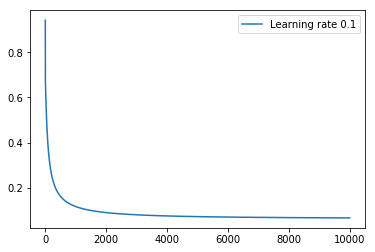

In [14]:
# Initiate Model
logistic_regression = LogisticRegression(training_set=training_set,
                                         labels=training_labels,
                                         learning_rate=learning_rate)

# Train model for 10000 epochs
logistic_regression.train_network(epochs=10000)

# Plot cost history
plot_cost_history([learning_rate], [logistic_regression.cost_history])

## Evaluate Model

In [15]:
# Retrieve prediction for the test_set by the trained network
test_pred = logistic_regression.test_network(test_set)

# Get Accuracy
accuracy = get_accuracy(test_labels, test_pred) * 100
print("Prediction Accuracy {0}%".format(accuracy))

Prediction Accuracy 100.0%


## Decision Boundary plot

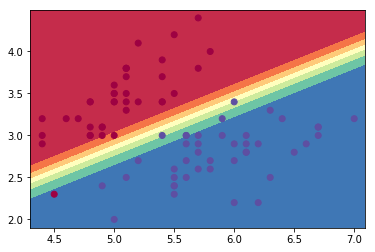

In [16]:
# Plot decision boundary
plot_decision_boundary(training_set, training_labels, logistic_regression.test_network)